# Exercices

## Dérivée numérique décentrée

Pour un ensemble de points de coordonnées $\{(x_i,y_i)\}$ où $y$ est une fonction de $x$, nous avons vu qu'une première approximation pour calculer la dérivée $y' = \frac{\mathrm{d}y}{\mathrm{d}x}$ est de calculer la pente entre deux points consécutifs.

$$
y'_i = \frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}
$$

Il est cependant arbitraire d'associer la dérivée en un point avec la pente par rapport au point *suivant*, plutôt que la pente par rapport au point précédent. Une deuxième approximation peut donc s'écrire :

$$
y'_i = \frac{y_{i}-y_{i-1}}{x_{i}-x_{i-1}}
$$

Ces deux approximations sont appelées respectivement *dérivée décentrée à droite* et *dérivée décentrée à gauche*.


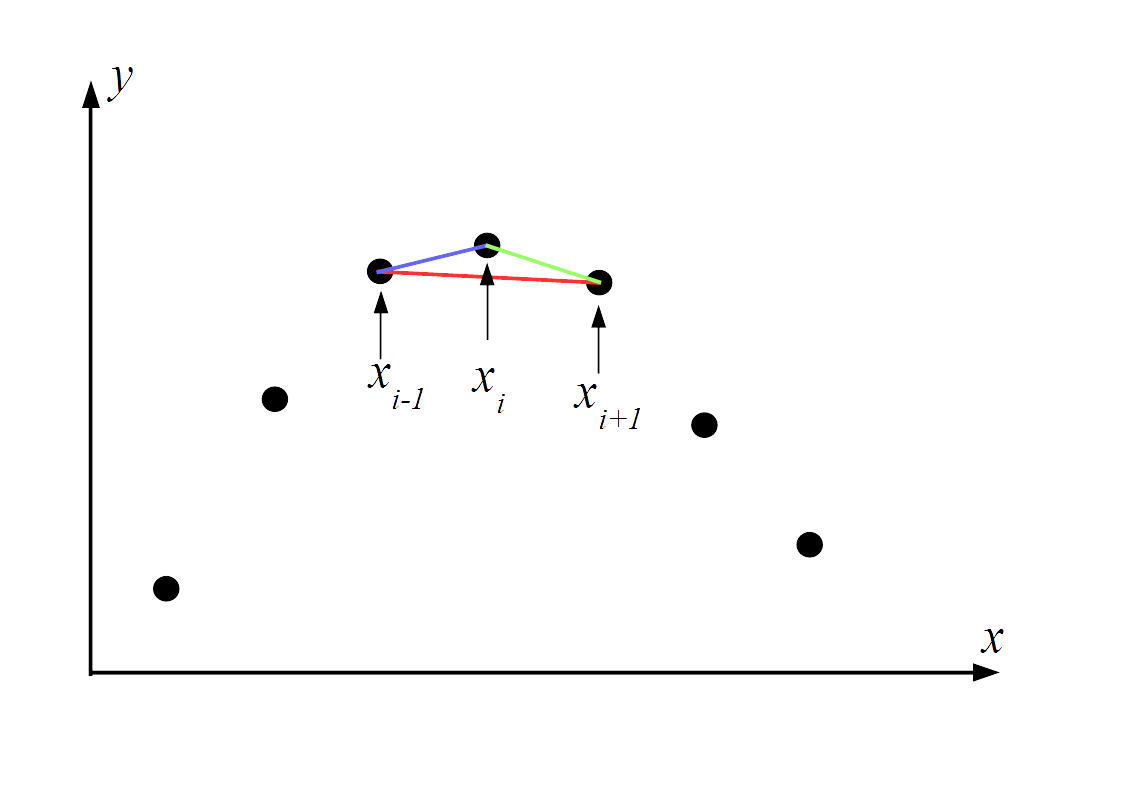

Comme on peut le voir sur la figure ci-dessus, ces deux approximations (en vert et en bleu) ne sont pas toujours satisfaisantes car elles sont arbitrairement biaisées d'un côté ou de l'autre du point considéré.
Une troisième approximation consiste à prendre la pente entre les deux points adjacents au point considéré. Cette approximation est appelée *dérivée centrale* :

$$
y'_i = \frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}}
$$

1. Programmez une fonction pour ces trois différentes approximations. La fonction pourra prendre en arguments des points $\{(x_i,y_i)\}$ sous forme de listes ou de tableaux `numpy` (plusieurs solutions sont possibles).

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def derive_vers_droite (x,y):
    """
    Dérivation vers le point a droite de $x_i$, c'est à dire en $x_{i+1}$
    """
    n = len(x) - 1
    x_out = np.zeros(n)
    y_out = np.zeros(n)

    for i in range(n):
        x_out[i] = x[i]
        y_out[i] = ( y[i+1] - y[i] ) / ( x[i + 1] - x[i] )

    return [x_out, y_out]


def derive_vers_gauche (x,y):
    """
    Dérivation vers le point a gauche de $x_i$, c'est à dire en $x_{i-1}$
    """
    n = len(x) - 1
    x_out = np.zeros(n)
    y_out = np.zeros(n)

    for i in range(n):
        x_out[i] = x[i]
        y_out[i] = ( y[i] - y[i - 1] ) / ( x[i] - x[i - 1] )

    return [x_out, y_out]

def derive_au_centre(x, y):
    """
    Dérivation au centre de point $x_i$
    """
    n = len(x)
    x_out = np.zeros(n)
    y_out = np.zeros(n)

    # On ajoute des valeaus aux bornes
    # au début
    x_out[0] = x[0]
    y_out[0] = ( y[1] - y[0] ) - ( x[1] - x[0] )
    # à la fin
    x_out[n - 1] = x[n - 1]
    y_out[n - 1] = ( y[n - 1] - y [n - 2] ) / (x[n - 1] - x[n - 2])

    for i in range(n-2):
        x_out[i + 1] = x[i + 1]
        y_out[i + 1] = ( y[i + 2] - y[i] ) / ( x[i + 2] - x[i] )

    return [x_out, y_out]

2. Comparez les résultats obtenus pour les trois fonctions mathématiques connues que vous avez dérivées mathématiquement dans le calepin à préparer pour aujourd'hui, et comparez au résultat théorique. On prendra pour la liste de points en abscisse un intervalle contenu dans l'intervalle de définition de la fonction et un pas de 0,1 pour commencer.

In [48]:
def f(x):
    """
    @intervalle +- R
    """
    return ( 1 - (x ** 2) ) / ( (x ** 4) + (2 * x ** 2) + 1)

def g(x):
    """
    @intervalle -pi/2 +pi/2 
    """
    return np.tan(x)

def h(x):
    """
    @intervalle +- R
    """
    return 1 / ( 1 + np.exp(-x) )

In [49]:
def f_p(x):
    """
    Dérivee de fonction f(x)
    """
    return ( 2 * x ) * ( x ** 2 - 3 ) /  ( x ** 2 + 1 ) ** 3

def g_p(x):
    """
    Dérivee de fonction g(x)
    """
    return 1 + np.tan(x) ** 2

def h_p(x):
    """
    Dérivee de fonction h(x)
    """
    return np.exp(-x) / (1 + np.exp(-x)) ** 2

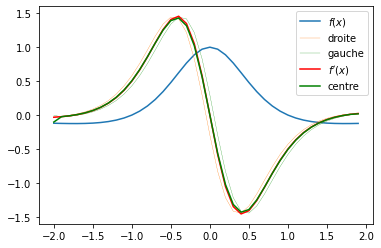

In [50]:
# Analyse por f(x)

x = np.arange(-2, 2, .1)

f_droite = derive_vers_droite(x, f(x))
f_gauche = derive_vers_gauche(x, f(x))
f_centre = derive_au_centre(x,f(x))

plt.plot(x, f(x), label='$f(x)$')
plt.plot(f_droite[0],f_droite[1], label='droite', linewidth=.3)
plt.plot(f_gauche[0],f_gauche[1], label='gauche', linewidth=.3)

plt.plot(x, f_p(x), label="$f'(x)$", color="red")
plt.plot(f_centre[0],f_centre[1], label='centre', color="green")

plt.legend()
plt.show()

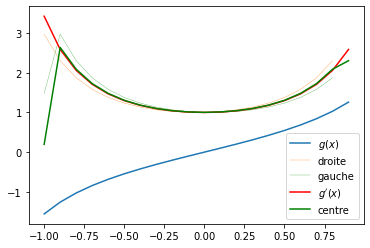

In [51]:
# Analyse por g(x)

x = np.arange(-1, 1, .1)

g_droite = derive_vers_droite(x, g(x))
g_gauche = derive_vers_gauche(x, g(x))
g_centre = derive_au_centre(x,g(x))

plt.plot(x, g(x), label='$g(x)$')
plt.plot(g_droite[0],g_droite[1], label='droite', linewidth=.3)
plt.plot(g_gauche[0],g_gauche[1], label='gauche', linewidth=.3)

plt.plot(x, g_p(x), label="$g'(x)$", color="red")
plt.plot(g_centre[0],g_centre[1], label='centre', color="green")

plt.legend()
plt.show()

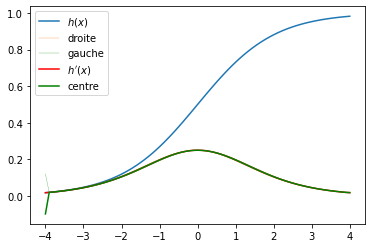

In [52]:
# Analyse por h(x)

x = np.arange(-4, 4.1, .1)

h_droite = derive_vers_droite(x, h(x))
h_gauche = derive_vers_gauche(x, h(x))
h_centre = derive_au_centre(x,h(x))

plt.plot(x, h(x), label='$h(x)$')
plt.plot(h_droite[0],h_droite[1], label='droite', linewidth=.3)
plt.plot(h_gauche[0],h_gauche[1], label='gauche', linewidth=.3)

plt.plot(x, h_p(x), label="$h'(x)$", color="red")
plt.plot(h_centre[0],h_centre[1], label='centre', color="green")

plt.legend()
plt.show()

3. Quantifiez et affichez l'erreur entre les 3 méthodes numériques, et le résultat théorique. Faites varier le pas de la dérivée et observez son influence sur la précision obtenue.

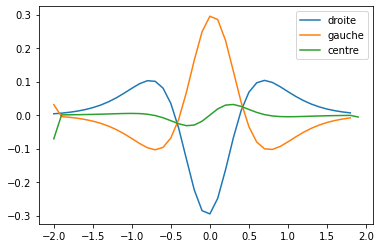

In [53]:
# Pour f(x)

plt.plot( f_droite[0], f_droite[1] - f_p(f_droite[0]) , label='droite' )
plt.plot( f_gauche[0], f_gauche[1] - f_p(f_gauche[0]) , label='gauche' )
plt.plot( f_centre[0], f_centre[1] - f_p(f_centre[0]) , label='centre' )

plt.legend()
plt.show()

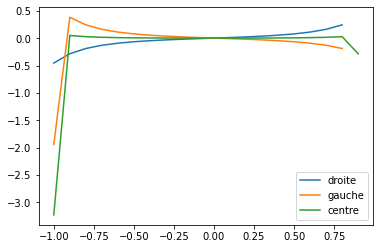

In [54]:
# Pour g(x)

plt.plot( g_droite[0], g_droite[1] - g_p(g_droite[0]) , label='droite' )
plt.plot( g_gauche[0], g_gauche[1] - g_p(g_gauche[0]) , label='gauche' )
plt.plot( g_centre[0], g_centre[1] - g_p(g_centre[0]) , label='centre' )

plt.legend()
plt.show()

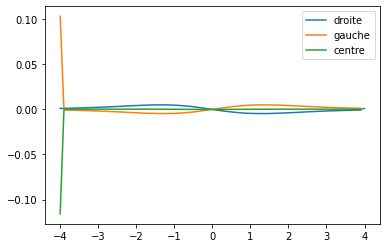

In [55]:
# Pour h(x)

plt.plot( h_droite[0], h_droite[1] - h_p(h_droite[0]) , label='droite' )
plt.plot( h_gauche[0], h_gauche[1] - h_p(h_gauche[0]) , label='gauche' )
plt.plot( h_centre[0], h_centre[1] - h_p(h_centre[0]) , label='centre' )

plt.legend()
plt.show()

## Dérivée d'une courbe expérimentale

En physique expérimentale, il est rare d'analyser des points bien sagement ordonnés avec une précision à 12 chiffres. De plus, toute mesure expérimentale contient du bruit.

Dans la suite, vous allez essayer de dériver un exemple de courbe expérimentale à partir des données brutes.

1. Importez le fichier de données *dataBSCCO.csv* (par exemple avec le module `pandas`) qui contient une mesure de résistance d'un échantillon 2D de supraconducteur à haute température critique (le $\mathrm{Bi}_2\mathrm{Sr}_2\mathrm{CaCu}_2\mathrm{O}_{8+\delta}$) en fonction de la température. Affichez quelques lignes de son contenus, ainsi qu'un graphe des données *Rs* (résistance 2D en ohms par carré - $\Omega/\square$ abbrégé *Ohmsq*) en fonction de *T* (température en kelvins).

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('dataBSCCO.csv')

df.head()

,T(K),Rs(Ohmsq)
0,29.527,1.85548
1,29.565,7.28151
2,29.693,3.79314
3,29.881,-10.66002
4,30.110,2.55768


In [63]:
df.columns

Index(['T(K)', 'Rs(Ohmsq)'], dtype='object')

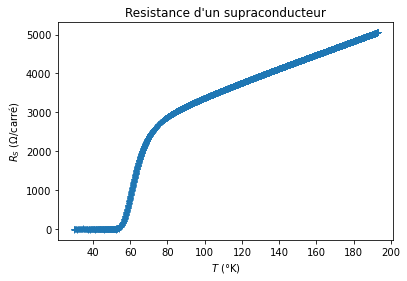

In [71]:
plt.plot(df['T(K)'], df['Rs(Ohmsq)'],'+')
plt.title('Resistance d\'un supraconducteur')
plt.xlabel('$T$ (°K)')
plt.ylabel('$R_S$ ($\Omega$/carré)')
plt.show()

Vous pouvez essayer d'utiliser les méthodes de dérivation numériques précédentes sur cette courbe. *A priori* ça ne marchera pas car les données *T(K)* ne sont pas uniformément réparties et ne varient pas de façon strictement monotone.

Avant de dériver cette courbe, il faut donc mettre en forme les données. On peut par exemple :
- Interpoler les données sur un tableau régulier avec la fonction `numpy.interp`.
- Moyenner localement la courbe. Créer un tableau régulier en abscisse {$x_i$} avec un pas $p$, sélectionner les points de données tels que $|T-x_i|<p$ et en faire une moyenne pour chaque $i$.

2. Créez une nouvelle fonction qui permet de créer, à partir des données brutes, des données qui pourront être utilisées par les méthodes de dérivation créées précédemment.
   
3. Appliquez cette nouvelle fonction aux données brutes et étudiez le comportement de la dérivée en fonction du pas choisi.

In [65]:
# Avant de dériver, il faut mettre en forme les données
# Ici, on utilise une méthode de moyenne locale pour obtenir des points R(T) sur une grille régulière
# D'autres solutions sont possibles

def lavg(x,y,step): # fonction moyenne locale 
    
    # L'idée est de créer un tableau régulier en abscisse avec un pas 'step'
    # puis de moyenner tous les points d'abscisses proches des points du nouveau tableau
    
    # bornes des abcisses
    xmin=np.min(x) 
    xmax=np.max(x)
    
    # premièrement on vérifie que le pas n'est pas trop petit pour les données
    # si le pas est trop petit, on pourrais trouver un point sans données à moyenner
    
    # on cherche donc le pas le plus petit acceptable, 
    # c'est a dire l'écart maximum entre deux abscisses consécutives
    stepmin=0 
    for i in range(len(x)-1):
        if abs(x[i]-x[i+1])>stepmin:
            stepmin=abs(x[i]-x[i+1])
    
    if step<stepmin: # si le pas est trop petit pour la moyenne, on envoie un message d'erreur
        print("step too small")
        return 0
    
    # on crée le nouveau tableau abscisses
    nx=np.arange(xmin,xmax,step)
    # on initialize le nouveau tableau ordonnées
    ny=np.zeros(len(nx))
    
    for i in range (len(nx)): # pour chaque point de nx
        xresult=[] # initialisation de xresult
        for j in range(len(x)): # on cherche tous les points de x contenus dans l'intervalle autour du nx[i]
            if x[j]>=(nx[i]-step/2) and x[j]<(nx[i]+step/2):
                xresult.append(j) # on liste ces points dans xresult
        
        for j in range(len(xresult)): # on moyenne ensuite les ordonnées correspondantes
            ny[i]=ny[i]+y[xresult[j]]
        ny[i]=ny[i]/len(xresult)
        
    return [nx,ny] # on retourne une liste de 2 tableaux numpy [abscisses, ordonnées]



def derivclean(x,y,step): #fonction combinant moyenne locale et dérivée
    cleaned=lavg(x,y,step)
    
    if cleaned==0: # si le pas est trop petit pour la moyenne, on envoie un message d'erreur
        print("step too small")
        return 0
    
    nx=cleaned[0]
    ny=cleaned[1]
    deriv=derive_au_centre(nx,ny) # on apelle la fonction de dérivation 
    
    return [nx,ny,deriv[1]] # on retourne à la fois le nouvel abscisse, la courbe moyennée et sa dérivée
        

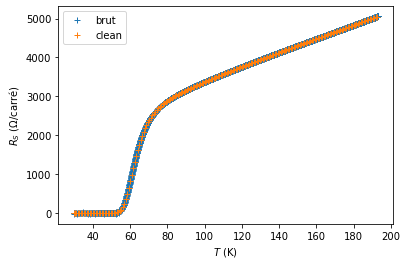

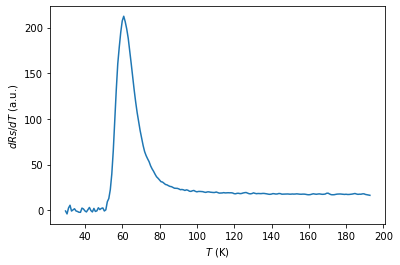

In [70]:
df.sort_values(by=['T(K)'], inplace=True) # optionnel, on peut aussi trier les données, avec T croissant

# on le transforme en array numpy
datas=np.array(df)

# on sépare les deux colonnes
T=datas[:,0]
R=datas[:,1]

out=derivclean(T,R,0.8)
#on affiche d'abord la fonction et son interpolation
plt.plot(T,R,'+',label='brut')
plt.plot(out[0],out[1],'+',label='clean')
plt.xlabel('$T$ (K)')
plt.ylabel('$R_S$ ($\Omega$/carré)')
plt.legend()
plt.show()
#on affiche ensuite la dérivée
plt.plot(out[0],out[2])
plt.xlabel('$T$ (K)')
plt.ylabel('$dRs/dT$ (a.u.)')
plt.show()

## Intégration numérique

Nous allons étudier plusieurs méthodes d'intégration numérique. Nous commençons par rappeler la méthode des rectangles vue dans la partie cours.

### Méthode des rectangles

Pour une fonction intégrable $f$, on cherche à calculer l'intégrale suivante :
$$
I(f) = \int_{a}^{b} f(x)\mathrm{d}x 
$$
On choisit de discrétiser l'intervalle $[a,b]$ en $n$ intervalles de même longueur, repérés par les points $x_i = a+i\times \Delta x$ avec $\Delta x=\frac{b-a}{n}$ . Une approximation de l'intégrale $I(f)$ est donnée par :
$$
I(f) \approx  I_n(f) = \sum_{i=0}^{n-1} f(x_i)\Delta x 
$$


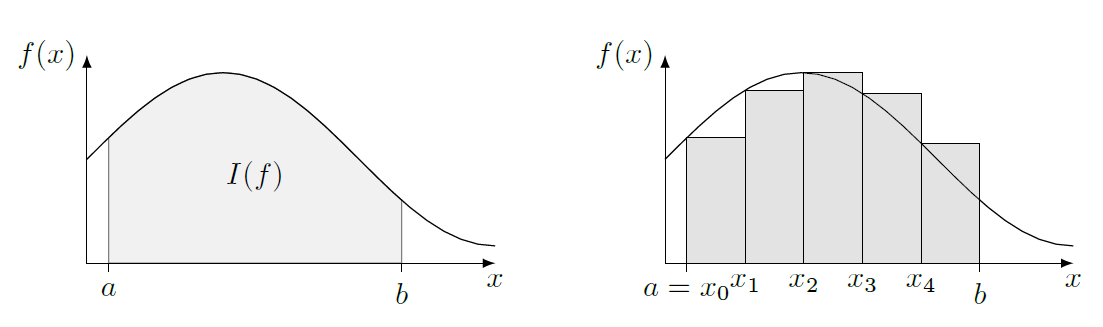

### Méthode du point milieu

Une approximation plus précise de l'intégrale $I(f)$ peut être calculée en considérant les valeurs de $f$ au centre des $n$ intervalles considérés. C'est-à-dire les points de coordonnées $x_i = a + (i+1/2)\times\Delta x$. L'intervalle est alors calculé par l'approximation :
$$
J_n(f) = \sum_{i=0}^{n-1} f(x_i)\Delta x  
$$

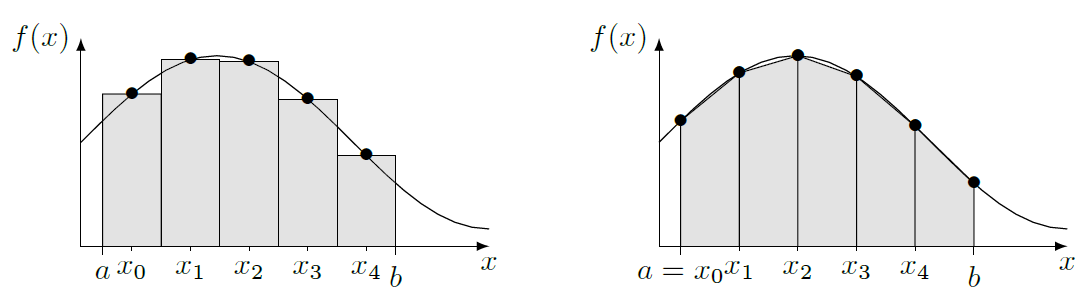

### Méthode des trapèzes
Enfin, la méthode des trapèzes consiste à approximer la fonction $f$ par une fonction affine par morceaux entre les points de coordonnées $x_i = a + i\times\Delta x$. On peut alors calculer l'intégrale :
$$
K_n(f) = \sum_{i=0}^{n-1} \frac{f(x_i)+f(x_{i+1})}{2}\Delta x 
$$

1. Implémentez ces trois méthodes d'intégration numérique sous la forme de fonctions. On pourra mettre en arguments des fonctions : la fonction à intégrer, les bornes d'intégrations et le nombre de points d'intégration.


In [72]:
# Méthode des rectangles
def Intrect(f,a,b,n):    
    deltax = (b-a)/n
    output = 0 #initialization de la somme à zéro
    for i in range(n):
        output = output + f(a+i*deltax)*deltax
    return output

# Méthode du point milieu
def Intmilieu(f,a,b,n):    
    deltax = (b-a)/n    
    output = 0 #initialization de la somme à zéro
    for i in range(n):
        output = output + f(a+(i+0.5)*deltax)*deltax
    return output

# Méthode des trapèzes
def Inttrap(f,a,b,n):
    deltax = (b-a)/n
    output = 0 #initialization de la somme à zéro
    for i in range(n):
        output = output + (f(a+i*deltax)+f(a+(i+1)*deltax))*deltax/2
    return output

2. Appliquez ces méthodes d'intégration aux trois fonctions données en introduction et comparez aux valeurs analytiques que vous aurez calculées en choisissant des bornes appropriées.

In [73]:
# Primitives

def F(x):
    return (x**2+x+1)/(x**2+1)

def G(x):
    return -np.log(np.cos(x))

def H(x):
    return np.log(1+np.exp(x))

In [74]:
# pour calculer l'intégrale de f entre a et b

a=-1
b=2
n=100
print("exact :\t\t",F(b)-F(a))
print("rectangle :\t",Intrect(f,a,b,n))
print("milieu :\t",Intmilieu(f,a,b,n))
print("trapeze :\t",Inttrap(f,a,b,n))

exact :		 0.8999999999999999
rectangle :	 0.9017649037043426
milieu :	 0.9000175467586048
trapeze :	 0.8999649037043423


In [75]:
# pour calculer l'intégrale de g entre a et b

a=0
b=1
n=100
print("exact :\t\t",G(b)-G(a))
print("rectangle :\t",Intrect(g,a,b,n))
print("milieu :\t",Intmilieu(g,a,b,n))
print("trapeze :\t",Inttrap(g,a,b,n))

exact :		 0.6156264703860141
rectangle :	 0.6078596436599304
milieu :	 0.6156163647222771
trapeze :	 0.6156466822832047


In [76]:
# pour calculer l'intégrale de h entre a et b

a=0
b=1
n=100
print("exact :\t\t",H(b)-H(a))
print("rectangle :\t",Intrect(h,a,b,n))
print("milieu :\t",Intmilieu(h,a,b,n))
print("trapeze :\t",Inttrap(h,a,b,n))

exact :		 0.6201145069582775
rectangle :	 0.6189587691633259
milieu :	 0.6201147294096454
trapeze :	 0.620114062056476


3. Étudiez le comportement de l'erreur d'approximation avec le nombre de points. On pourra par exemple tracer un graphe de l'erreur en fonction du nombre de points (10, 100, 1000, etc.)

In [77]:
# on crée un fonction qui prend en entrée :
# la fonction d'intégration choisie, la primitive analytique, les bornes, et la liste des nombres de points

def errorplot(Int,F,f,a,b,n):
    # on initialize le tableau numpy de sortie
    erreurs=np.zeros(len(n)) 
    
    if F(a)==F(b):        
        # au cas ou l'integrale analytique est nulle, on prend la en val. absolue
        for i in range(len(n)):
            # pour chaque nombre de points, on calcule l'erreur
            erreurs[i] = abs(Int(f,a,b,int(n[i]))) 
            # notez le int() pour s'assurer que le ni est bien un entier...
            
    else: 
        # si l'integrale est non nulle on prends l'erreur relative
        exact=(F(b)-F(a))
        for i in range(len(n)):
            # pour chaque nombre de points dans la liste n, on calcule l'erreur
            erreurs[i] = abs(exact-Int(f,a,b,int(n[i])))/abs(exact) 
            
    return erreurs # on retourne la liste des erreurs sous forme de tableau numpy

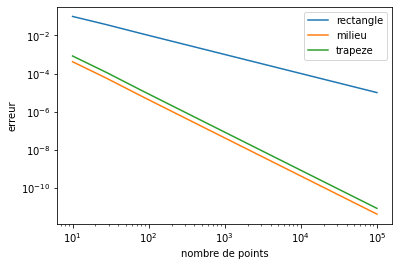

In [78]:
# pour f


# on crée la liste des nombres de points à tester
n=np.logspace(1,5,10)

# on choisi les bornes d'intégrations
a=0
b=1

plt.loglog(n,errorplot(Intrect,F,f,a,b,n),label='rectangle')
plt.loglog(n,errorplot(Intmilieu,F,f,a,b,n),label='milieu')
plt.loglog(n,errorplot(Inttrap,F,f,a,b,n),label='trapeze')
plt.xlabel('nombre de points')
plt.ylabel('erreur')
plt.legend()
plt.show()

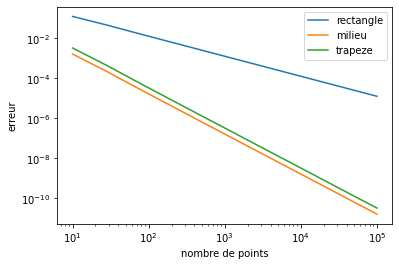

In [79]:
# pour g


# on crée la liste des nombres de points à tester
n=np.logspace(1,5,10)

# on choisi les bornes d'intégrations
a=0
b=1

plt.loglog(n,errorplot(Intrect,G,g,a,b,n),label='rectangle')
plt.loglog(n,errorplot(Intmilieu,G,g,a,b,n),label='milieu')
plt.loglog(n,errorplot(Inttrap,G,g,a,b,n),label='trapeze')
plt.xlabel('nombre de points')
plt.ylabel('erreur')
plt.legend()
plt.show()

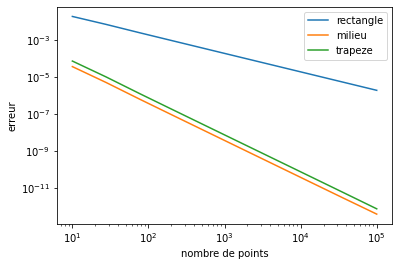

In [80]:
# pour h


# on crée la liste des nombres de points à tester
n=np.logspace(1,5,10)

# on choisi les bornes d'intégrations
a=0
b=1

plt.loglog(n,errorplot(Intrect,H,h,a,b,n),label='rectangle')
plt.loglog(n,errorplot(Intmilieu,H,h,a,b,n),label='milieu')
plt.loglog(n,errorplot(Inttrap,H,h,a,b,n),label='trapeze')
plt.xlabel('nombre de points')
plt.ylabel('erreur')
plt.legend()
plt.show()

## Pour aller plus loin

Dérivation et intégration étant incontournables en mathématiques et en physique, il serait étonnant de ne pas trouver ces outils dans certains modules. Le module `scipy` propose en effet les fonctions `derivative` et `integrate`, dont vous pouvez consulter la documentation :
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
- https://docs.scipy.org/doc/scipy/reference/integrate.html

On peut également mentionner le module `sympy` qui permet de différencier et intégrer de manière formelle.

In [82]:
import sympy as sp
x, y, z = sp.symbols('x y z')

In [83]:
sp.diff(sp.tan(x), x)

tan(x)**2 + 1

In [86]:
sp.integrate(sp.tan(x), x)

-log(cos(x))